In [ ]:
import numpy as np
import pandas as pd
import os

from PIL import Image

import matplotlib.pyplot as plt


import keras.layers as layers
import keras.optimizers as optimizers
from keras.models import Model, load_model
from keras import layers
from keras import models
from keras.models import load_model

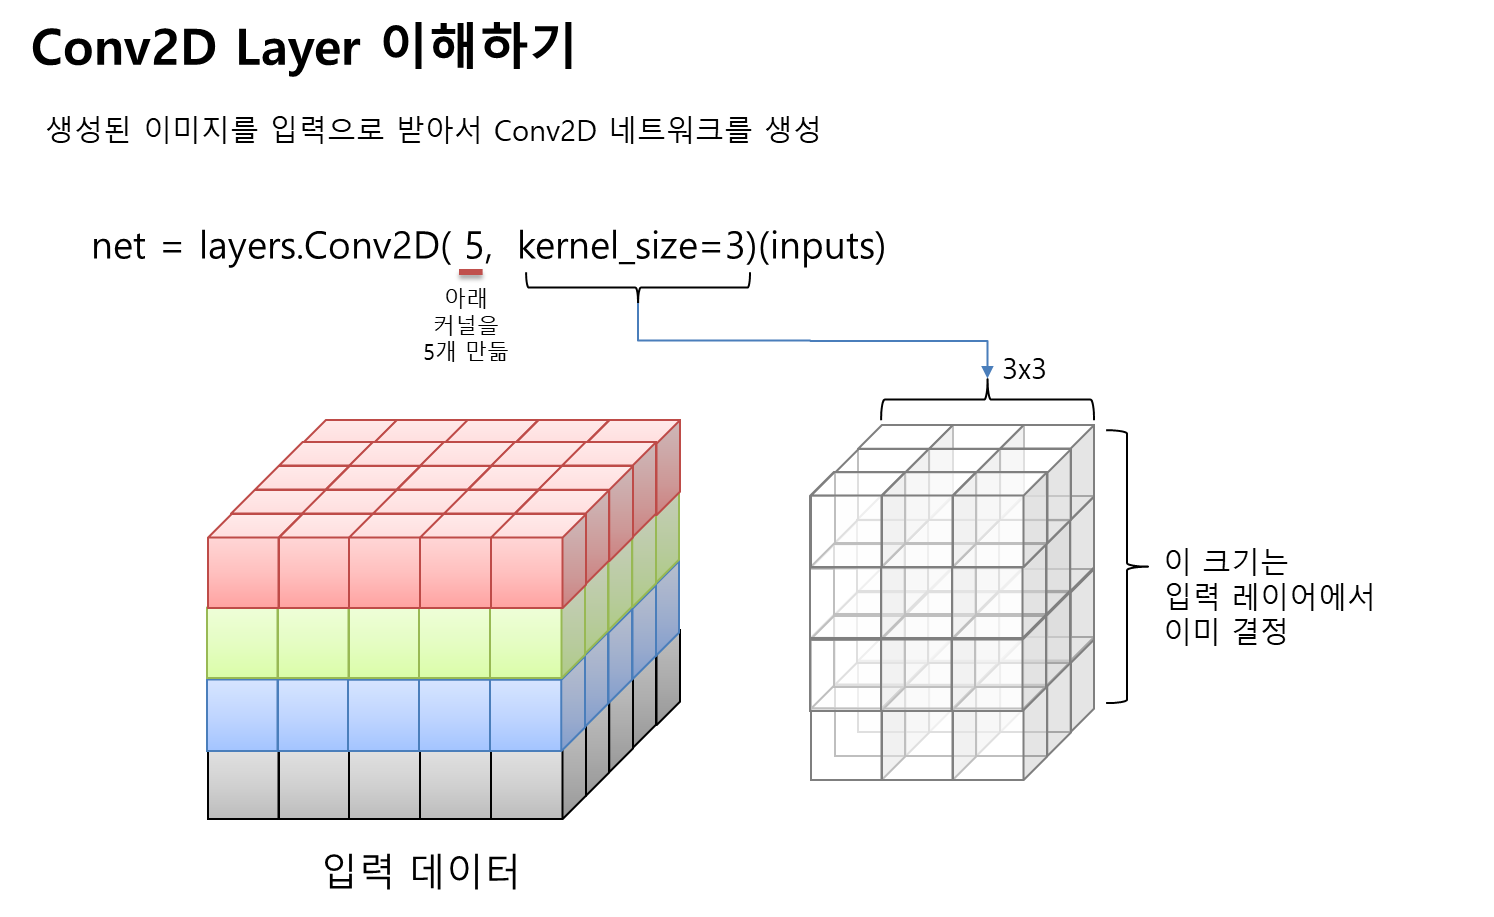

In [ ]:
#사용할 이미지를 생성

r = np.array([[200, 200, 200, 200, 200],
              [200, 200, 200, 200, 200],
              [200, 200, 200, 200, 200],
              [0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0]])
g = np.array([[100, 100, 100, 100, 100],
              [100, 100, 100, 100, 100],
              [100, 100, 100, 100, 100],
              [0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0]])
b = np.array([[50, 50, 50, 50, 50],
              [50, 50, 50, 50, 50],
              [50, 50, 50, 50, 50],
              [0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0]])
t = np.array([[255, 255, 255, 255, 255],
              [255, 255, 255, 255, 255],
              [255, 255, 255, 255, 255],
              [255, 255, 255, 255, 255],
              [255, 255, 255, 255, 255]])
img = np.zeros([5,5,4]).astype('int')
img[:,:,0] = r
img[:,:,1] = g
img[:,:,2] = b
img[:,:,3] = t

plt.imshow(img)

In [ ]:
#2D Conv 모델 생성
inputs = layers.Input(shape=(5, 5, 4))

net = layers.Conv2D(1, kernel_size=3)(inputs)
net = layers.LeakyReLU()(net)
net = layers.MaxPool2D(pool_size=2)(net)


net = layers.Flatten()(net)

net = layers.Dense(30, activation='relu')(net)

net = layers.Dense(1, activation = 'sigmoid')(net)

model = Model(inputs=inputs, outputs=net)

model.compile(
    loss='binary_crossentropy',  #mse, mean_absolute_error
    optimizer='adam',
    metrics=['acc']
)

model.summary()

In [ ]:
#Conv 레이어에 지정된 초기 가중치(랜덤 값) 을 확인한다.
conv2d_weight = model.layers[1].get_weights()[0]
conv2d_weight.shape

In [ ]:
conv2d_weight[:,:,:,0]

In [ ]:
#2D conv 레이어의 가중치를 임의의 필터로 강제 변환한다.

conv2d_weight[:,:,0,0] = [[0.1, 0.1, 0.1],
                          [0.1, 0.1, 0.1],
                          [0.1, 0.1, 0.1]]

conv2d_weight[:,:,1,0] = [[0.2, 0.2, 0.2],
                          [0.2, 0.2, 0.2],
                          [0.2, 0.2, 0.2]]

conv2d_weight[:,:,2,0] = [[0.4, 0.4, 0.4],
                          [0.4, 0.4, 0.4],
                          [0.4, 0.4, 0.4]]

conv2d_weight[:,:,3,0] = [[0., 0., 0.],
                          [0., 0., 0.],
                          [0., 0., 0.]]

model.layers[1].set_weights([conv2d_weight, np.array([0.])])
model.layers[1].get_weights()[0][:,:,:,0]

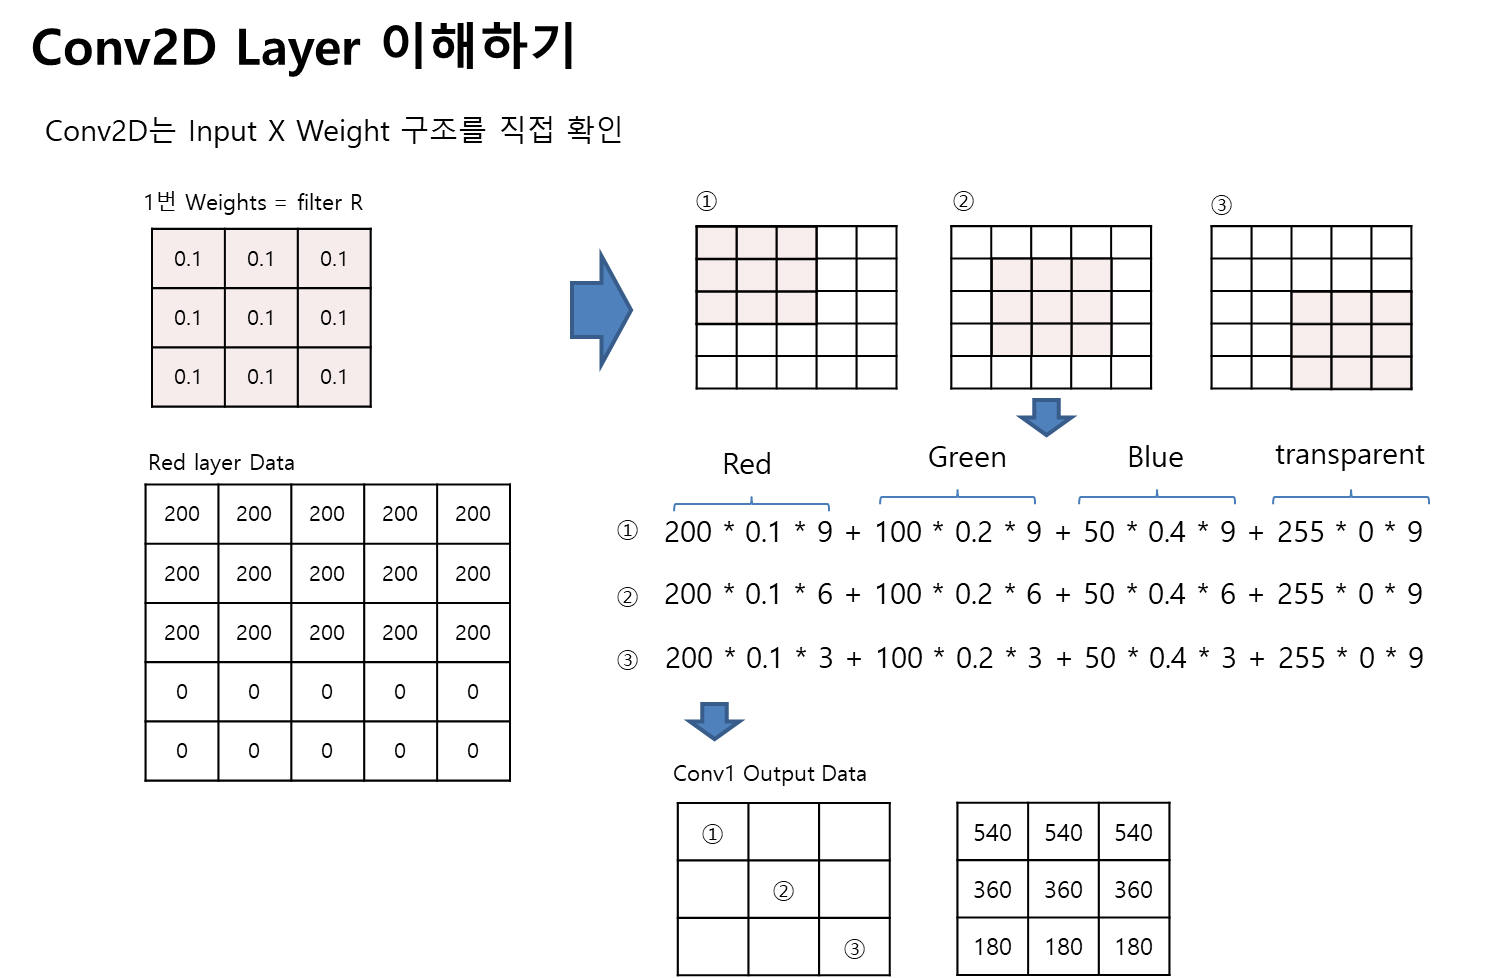

In [ ]:
#기존 케라스 모델에서 Conv2D가 최종 Output이 되게 모델을 자른후 new_model을 만들어 준다.
new_model = Model(model.input, model.layers[1].output)
new_model.summary()

In [ ]:
#new model에서 predict를 실행하여 input값과 Conv2D Filter의 연산 결과를 확인한다.
predict = new_model.predict(np.array([img]))
predict.shape

In [ ]:
#Conv2D Filter의 연산 결과를 확인한다.
predict[0,:,:,0]

In [ ]:
!wget "https://hycms.hanyang.ac.kr/index.php?module=xn_media_content2013&act=dispXn_media_content2013DownloadContent&content_id=670b2a7c70f18" -O "data.zip"
!unzip  -O cp949 "data.zip" -d "data"

In [ ]:
#실제 이미지를 불러온다.

img = Image.open('data/images/BV1171010400100090001.png')
data = np.array(img)

plt.figure(figsize=(500/80, 500/80))
plt.imshow(data)

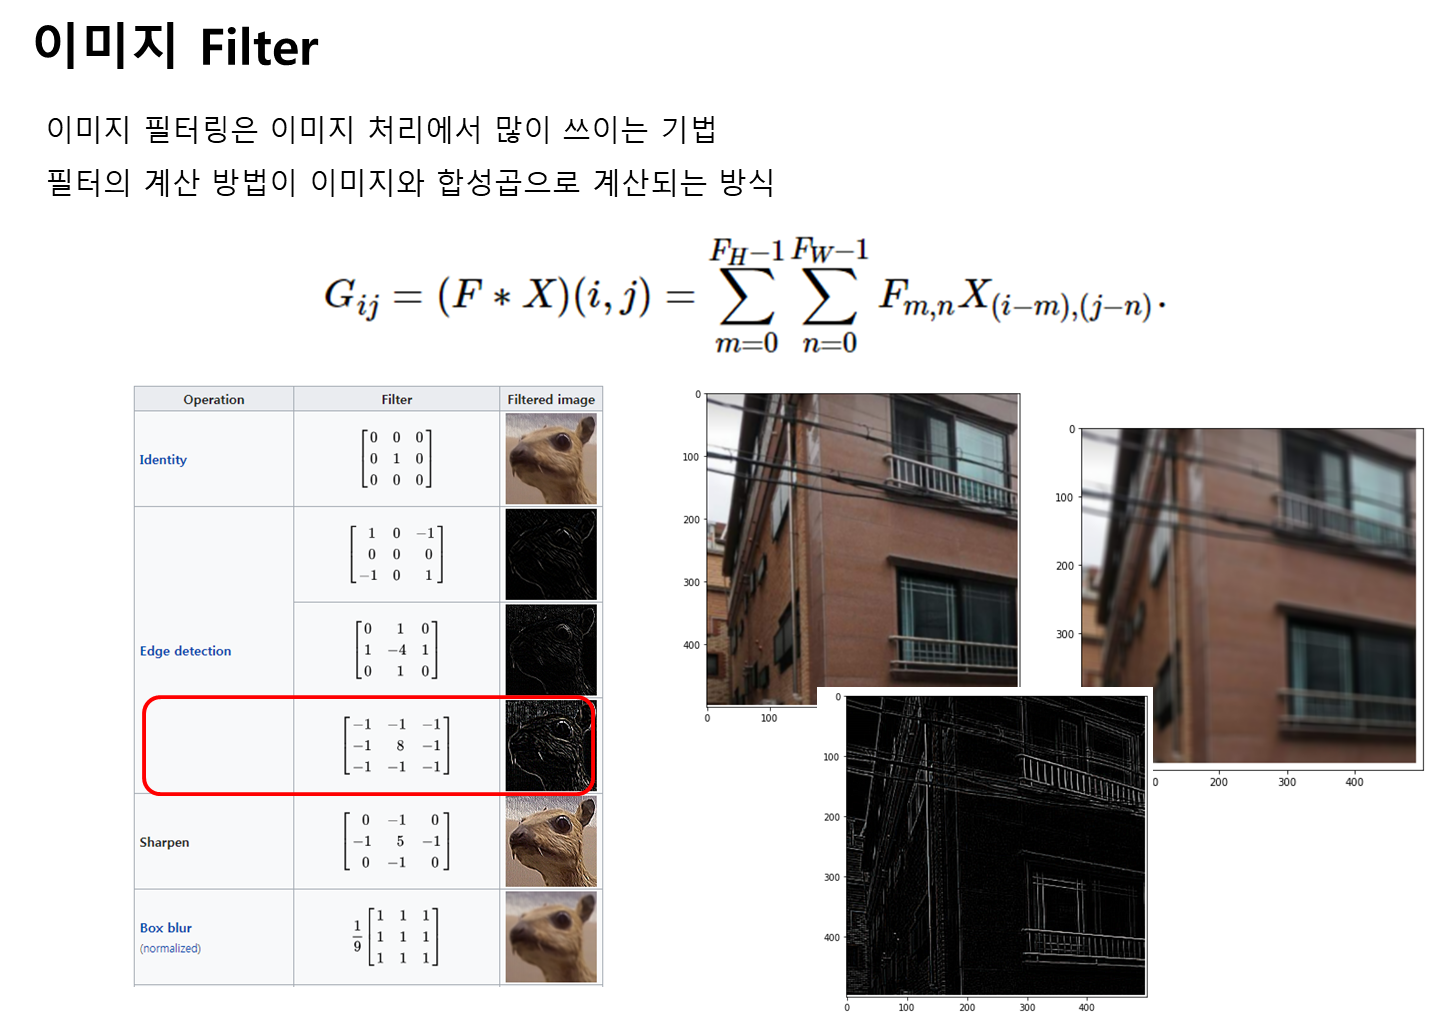

In [ ]:
#가우시안 블러 필터
f = np.array([[1, 2, 1],
                          [2, 4, 2],
                          [1, 2, 1]]) / 16.0

In [ ]:
# 샤프닝 필터
f = np.array([[ 0, -1,  0],
                    [-1,  5, -1],
                    [ 0, -1,  0]])

In [ ]:
# 엠보싱 필터
f = np.array([[-2, -1,  0],
                   [-1,  1,  1],
                   [ 0,  1,  2]])

In [ ]:
#edge filter를 만든다.
f = np.array([[-1, -1, -1],
              [-1,  8, -1],
              [-1, -1, -1]])

In [ ]:
#이미지 정보에 필터를 적용한다..
fh = (data.shape[0] - f.shape[0])
fw = (data.shape[1] - f.shape[1])

ret = np.full(data.shape, 255)
for m in range(fh):
    for n in range(fw):
        for c in range(3):
            ret[m, n, c] = np.sum(np.multiply(data[m:m+f.shape[0], n:n+f.shape[1], c], f))

ret[np.where(ret < 0)] = 0
ret[np.where(ret > 255)] = 255

plt.figure(figsize=(10, 5)) # Adjust the figure size as needed
plt.subplot(1, 2, 1)
plt.imshow(data)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(ret)
plt.title("Transformed Image")

plt.show()
